# Preprocessing and Linear Regression model Notebook
- Coded By : <span style="color: red;">Eng.Ahmed Almohamdy</span>


# Importing


In [620]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [621]:
pd.set_option('display.max_columns', None)
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [622]:
train_data.shape

(1460, 81)

# Handle Null Values

- <b> featured to be removed ---> 80%  is nan 
- <b> featured to filled --------> less than 80 % 
- <b> observation to be removed --> less than 3% 

In [623]:
null_df = train_data.isna().sum().reset_index().rename(columns = {0 : "nulls_count"})
null_df[null_df['nulls_count'] > 0 ].sort_values(by = ['nulls_count'] , ascending = False)

,index,nulls_count
72,PoolQC,1453
74,MiscFeature,1406
6,Alley,1369
73,Fence,1179
25,MasVnrType,872
57,FireplaceQu,690
3,LotFrontage,259
58,GarageType,81
59,GarageYrBlt,81
60,GarageFinish,81


In [624]:
f_to_be_removed = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu']
f_to_be_filled = ['LotFrontage']
obs_to_be_dropped = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'
                    ,'BsmtFinType2' ,'BsmtExposure' ,'BsmtFinType1' ,'BsmtCond','BsmtQual'
                     ,'MasVnrArea','Electrical']


In [625]:
train_data = train_data.drop(columns = f_to_be_removed)
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data = train_data.dropna(axis=0 , subset= obs_to_be_dropped)


In [626]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


# Redundant Handling

In [627]:
train_data['TotRmsAbvGrd'].value_counts().reset_index().sort_values(by = ['TotRmsAbvGrd'] , ascending = True)

,TotRmsAbvGrd,count
8,3,12
4,4,79
2,5,248
0,6,379
1,7,309
3,8,171
5,9,69
6,10,44
7,11,18
9,12,9


In [628]:
train_data.groupby(['TotRmsAbvGrd']).count()['Id'].reset_index()

,TotRmsAbvGrd,Id
0,3,12
1,4,79
2,5,248
3,6,379
4,7,309
5,8,171
6,9,69
7,10,44
8,11,18
9,12,9


In [629]:
num_cols = list(set(train_data.describe().columns) - set(['Id']))
cat_cols = list(set(train_data.columns) - set(num_cols) - set(['Id']))

In [630]:
train_data.shape

(1338, 75)

### automated function for both categorical and numircal data

In [631]:
def drop_redundant_coulmns(train_data , columns_type ):
    check_value = (80/100) * train_data.shape[0]
    droped_cols = []
    for col in columns_type:
        ma_x = max(train_data.groupby([col])['Id'].count())
        if ma_x >= check_value :
            droped_cols.append(col)
            train_data.drop(columns= [col], inplace=True)
    return droped_cols        
    

In [632]:
num_droped_cols = drop_redundant_coulmns(train_data , num_cols)
cat_droped_cols = drop_redundant_coulmns(train_data , cat_cols)
num_droped_cols + cat_droped_cols

['BsmtFinSF2',
 'MiscVal',
 'LowQualFinSF',
 'BsmtHalfBath',
 'ScreenPorch',
 '3SsnPorch',
 'KitchenAbvGr',
 'EnclosedPorch',
 'PoolArea',
 'Condition2',
 'SaleType',
 'Functional',
 'GarageQual',
 'ExterCond',
 'Street',
 'GarageCond',
 'CentralAir',
 'SaleCondition',
 'BsmtFinType2',
 'LandContour',
 'LandSlope',
 'BsmtCond',
 'BldgType',
 'RoofMatl',
 'Utilities',
 'Heating',
 'Electrical',
 'Condition1',
 'PavedDrive']

# Handling correlation between features

In [633]:
num_cols = list(set(train_data.describe().columns) - set(['Id']))
cat_cols = list(set(train_data.columns) - set(num_cols) - set(['Id']))

In [634]:
corr_matrix = train_data[list(set(num_cols) - set(['SalePrice']))].corr()
corr_matrix

,HalfBath,WoodDeckSF,MasVnrArea,OverallQual,LotArea,OverallCond,TotRmsAbvGrd,GarageCars,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,YrSold,MoSold,Fireplaces,1stFlrSF,GarageYrBlt,2ndFlrSF,YearRemodAdd,GrLivArea,LotFrontage,MSSubClass,YearBuilt,TotalBsmtSF,FullBath,BedroomAbvGr,GarageArea,OpenPorchSF
HalfBath,1.000000,0.084871,0.193268,0.249283,0.006052,-0.073568,0.357991,0.197136,-0.025251,-0.058884,-0.074157,-0.011440,-0.010915,0.191549,-0.146494,0.187518,0.619450,0.169456,0.415221,0.038287,0.197520,0.227626,-0.124788,0.134953,0.248138,0.126283,0.202363
WoodDeckSF,0.084871,1.000000,0.149182,0.218570,0.167822,-0.012947,0.166052,0.208674,0.187178,0.161982,-0.020711,0.021833,0.031197,0.183778,0.233200,0.224075,0.081291,0.201057,0.241277,0.069668,-0.010175,0.212296,0.214364,0.189532,0.049546,0.204033,0.058267
MasVnrArea,0.193268,0.149182,1.000000,0.401175,0.096727,-0.141080,0.289758,0.363916,0.253015,0.078875,0.104662,-0.001521,-0.013461,0.229365,0.341001,0.249750,0.169730,0.168311,0.392006,0.176176,0.031333,0.299410,0.365629,0.272271,0.108829,0.367237,0.129015
OverallQual,0.249283,0.218570,0.401175,1.000000,0.090451,-0.163080,0.442941,0.591878,0.197441,0.083254,0.292940,-0.013949,0.062641,0.377359,0.481978,0.545835,0.281145,0.549460,0.594470,0.225559,0.051690,0.570668,0.505897,0.580425,0.081994,0.530092,0.307615
LotArea,0.006052,0.167822,0.096727,0.090451,1.000000,0.001415,0.185654,0.138228,0.210148,0.160687,-0.014589,-0.012066,0.000118,0.263061,0.288502,-0.025700,0.047773,0.001681,0.255445,0.300018,-0.134158,-0.005022,0.267188,0.115727,0.120369,0.168630,0.084942
OverallCond,-0.073568,-0.012947,-0.141080,-0.163080,0.001415,1.000000,-0.063883,-0.249832,-0.060068,-0.070089,-0.161038,0.056340,-0.011772,-0.031910,-0.144066,-0.336541,0.011685,0.035076,-0.093843,-0.042652,-0.098153,-0.417330,-0.228020,-0.211882,0.023180,-0.204905,-0.060429
TotRmsAbvGrd,0.357991,0.166052,0.289758,0.442941,0.185654,-0.063883,1.000000,0.404416,0.046284,-0.052065,0.242020,-0.046446,0.041562,0.332325,0.393786,0.148625,0.619275,0.174660,0.823491,0.320910,0.014514,0.099415,0.297609,0.547592,0.658923,0.368435,0.249396
GarageCars,0.197136,0.208674,0.363916,0.591878,0.138228,-0.249832,0.404416,1.000000,0.197559,0.131403,0.242278,-0.037593,0.032796,0.245895,0.440237,0.590301,0.187208,0.459449,0.483943,0.268568,0.006872,0.524076,0.453427,0.512502,0.119537,0.832166,0.242805
BsmtFinSF1,-0.025251,0.187178,0.253015,0.197441,0.210148,-0.060068,0.046284,0.197559,1.000000,0.638094,-0.552809,0.023958,-0.021242,0.245323,0.450366,0.144611,-0.151876,0.099681,0.201974,0.220518,-0.069053,0.224264,0.505000,0.045094,-0.119100,0.284095,0.107561
BsmtFullBath,-0.058884,0.161982,0.078875,0.083254,0.160687,-0.070089,-0.052065,0.131403,0.638094,1.000000,-0.463986,0.072016,-0.022993,0.133045,0.251597,0.115751,-0.184112,0.099294,0.028857,0.103041,-0.011317,0.175108,0.282031,-0.084267,-0.161723,0.186558,0.072805


##### If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable)

In [635]:
def drop_correlated_columns(corr_matrix):
    droped_cols = []
    for row in range(corr_matrix.shape[1]):
        for column in range(row+1 , corr_matrix.shape[1] ):
            if np.abs(corr_matrix.values[row , column]) >= .7 :
                row_with_response = np.corrcoef(train_data['SalePrice'],
                                                train_data[corr_matrix.index[row]])[0,1]
                
                col_with_response = np.corrcoef(train_data['SalePrice'],
                                                train_data[corr_matrix.columns[column]])[0,1]
                
                
                if np.abs(row_with_response) >= np.abs(col_with_response):
                    droped_cols.append(corr_matrix.columns[column])
                else :
                    droped_cols.append(corr_matrix.index[row])
                    
    return droped_cols                    
                    


In [636]:
corr_droped_cols = drop_correlated_columns(corr_matrix)
print(f'the columns are droped are  {corr_droped_cols}')
train_data = train_data.drop(columns=corr_droped_cols)

the columns are droped are  ['TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt']


# Handling Outliers 
- lower band = q1 - (1.5*IQR)
- Upper band = q3 + (1.5*IQR)

In [637]:
num_cols = list(set(train_data.describe().columns) - set(['Id']))
cat_cols = list(set(train_data.columns) - set(num_cols) - set(['Id']))

In [640]:
# def outliers_clamping(col , value):
    
#     Q1 = np.quantile(train_data[col] , .25)
#     Q3 = np.quantile(train_data[col] , .75)
    
#     IQR = Q3 - Q1
    
#     Upper_Bound = Q3 + 1.5*IQR
#     Lower_Bound = Q1 - 1.5*IQR
    
#     if value > Upper_Bound:
#         return Upper_Bound
#     elif value < Lower_Bound:
#         return Lower_Bound
#     else:
#         return value
  

def outliers_clamping(train_data , num_cols):
    for col in num_cols:
    
        Q1 = np.quantile(train_data[col] , .25)
        Q3 = np.quantile(train_data[col] , .75)

        IQR = Q3 - Q1

        Upper_Bound = Q3 + 1.5*IQR
        Lower_Bound = Q1 - 1.5*IQR

        indxs = train_data[train_data[col] > Upper_Bound][[col]].index 
        train_data.loc[indxs , col] = Upper_Bound
        
        indxs = train_data[train_data[col] < Lower_Bound][[col]].index 
        train_data.loc[indxs , col] = Lower_Bound
    
   

In [641]:
outliers_clamping(train_data, num_cols)

In [643]:
# for col in num_cols:
#   train_data[col] = train_data[col].apply(lambda x: outliers_clamping(col, x))

# Skewness Handling
- skewness = sum(x-x^)^3/((segma^2)(N-1)) 

In [644]:
def calc_skewness(train_data , num_cols):
    N = train_data.shape[0]
#     skewness_dic ={}
    skewness_coef =[]
    for col in num_cols:
        skewness =np.sum((train_data[col] - np.mean(train_data[col]))**3) / ((N-1) * (np.std(train_data[col])**3))
#         skewness_dic.update({col:skewness})
        skewness_coef.append(skewness)
    return skewness_coef 
        

In [645]:
skewness_coef = calc_skewness(train_data , num_cols)
skewness_coef

[0.5538061076465449,
 1.0478144089723926,
 0.31510025787995627,
 1.2521164495236015,
 0.19248757523691165,
 0.6728283761397346,
 0.13443435745297858,
 0.6960016045579253,
 0.797969874419801,
 0.10930335336943882,
 0.2051803283386069,
 0.5005873060724986,
 0.6610710333210326,
 -0.5631343551088509,
 0.7576498752575713,
 0.6027457269860452,
 0.06519984554151313,
 1.035352289946696,
 -0.6561427509313096,
 -0.014169525060876553,
 -0.2932046230131032,
 0.8583383840042282,
 0.45969294060066274,
 1.1254970698825024]

In [647]:
def log_transform(train_data , num_cols):
    skewness_coef = calc_skewness(train_data , num_cols)
    i=0
    for col in num_cols:
        if np.abs(skewness_coef[i]) > 1:
            train_data[col] = np.log(1+ np.abs( train_data[col]))
            print(col)

        i+=1    
        
    return train_data    
            
    
    
    
    

In [648]:
log_transform(train_data , num_cols)

WoodDeckSF
MasVnrArea
MSSubClass
OpenPorchSF


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,4.110874,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,2003.0,2003,Gable,VinylSd,VinylSd,5.283204,Gd,PConc,Gd,No,GLQ,706.0,150.0,Ex,856,854.0,1710.0,1,2,1,3.0,Gd,0.0,Attchd,RFn,2.0,0.000000,4.127134,2,2008,208500
1,2,3.044522,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,1976.0,1976,Gable,MetalSd,MetalSd,0.000000,TA,CBlock,Gd,Gd,ALQ,978.0,284.0,Ex,1262,0.0,1262.0,0,2,0,3.0,TA,1.0,Attchd,RFn,2.0,5.700444,0.000000,5,2007,181500
2,3,4.110874,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,2001.0,2002,Gable,VinylSd,VinylSd,5.093750,Gd,PConc,Gd,Mn,GLQ,486.0,434.0,Ex,920,866.0,1786.0,1,2,1,3.0,Gd,1.0,Attchd,RFn,2.0,0.000000,3.761200,9,2008,223500
3,4,4.262680,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,1915.0,1970,Gable,Wd Sdng,Wd Shng,0.000000,TA,BrkTil,TA,No,ALQ,216.0,540.0,Gd,961,756.0,1717.0,1,1,0,3.0,Gd,1.0,Detchd,Unf,3.0,0.000000,3.583519,2,2006,140000
4,5,4.110874,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,2000.0,2000,Gable,VinylSd,VinylSd,5.860786,Gd,PConc,Gd,Av,GLQ,655.0,490.0,Ex,1145,1053.0,2198.0,1,2,1,4.0,Gd,1.0,Attchd,RFn,3.0,5.262690,4.442651,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,4.110874,RL,62.0,7917.0,Reg,Inside,Gilbert,2Story,6,5.0,1999.0,2000,Gable,VinylSd,VinylSd,0.000000,TA,PConc,Gd,No,Unf,0.0,953.0,Ex,953,694.0,1647.0,0,2,1,3.0,TA,1.0,Attchd,RFn,2.0,0.000000,3.713572,8,2007,175000
1456,1457,3.044522,RL,85.0,13175.0,Reg,Inside,NWAmes,1Story,6,6.0,1978.0,1988,Gable,Plywood,Plywood,4.787492,TA,CBlock,Gd,No,ALQ,790.0,589.0,TA,2073,0.0,2073.0,1,2,0,3.0,TA,2.0,Attchd,Unf,2.0,5.857933,0.000000,2,2010,210000
1457,1458,4.262680,RL,66.0,9042.0,Reg,Inside,Crawfor,2Story,7,7.5,1941.0,2006,Gable,CemntBd,CmentBd,0.000000,Ex,Stone,TA,No,GLQ,275.0,877.0,Ex,1188,1152.0,2340.0,0,2,0,4.0,Gd,2.0,Attchd,RFn,1.0,0.000000,4.110874,5,2010,266500
1458,1459,3.044522,RL,68.0,9717.0,Reg,Inside,NAmes,1Story,5,6.0,1950.0,1996,Hip,MetalSd,MetalSd,0.000000,TA,CBlock,TA,Mn,GLQ,49.0,0.0,Gd,1078,0.0,1078.0,1,1,0,2.0,Gd,0.0,Attchd,Unf,1.0,5.905362,0.000000,4,2010,142125


# Feature Scaling
- standardization : use with normally feature
- min-max scaling : use with any another distribution but i should handle outliers 

##### How can i know if feature is normally or not 
using two method 
- QQ plot
- shapiro-wilk test  (most use)

In [649]:
# #QQ plot
# import statsmodels.api as sm
# ncols = 4
# nrows=6
# fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 40))
# i=0
# j=0
# for col in num_cols:
#     sm.qqplot(train_data[col],fit = False, line='q', ax = axes[i, j])
#     axes[i, j].set_title(col)
#     if(j<ncols-1):
#         j+=1
#     else:
#         i+=1
#         j=0
# plt.show()

#### shapiro-wilk test
- Testing the normally distributed features using Shapiro-Wilk test the null hypothesis here is     that the data follows a normal distribution we reject the null hypothesis (aka: data is not normally distributed) if the p-value is less than alpha (typically 5%) and we fail to reject the null hypothesis (aka: data is normally distributes) if the p-value is greater than alpha


In [650]:
feats_std_scale = []
feats_min_max_scale = []
from scipy.stats import shapiro
for col in num_cols:
    w_stat, p = shapiro(train_data[col])
    

    alpha = 1.76e-13
    if p > alpha:
        print(f'{col} looks like gaussian (fail to reject H0)')
        print('W_Statistic=%.3f, p=%.8f \n' % (w_stat, p))
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)')
        print('W_Statistic=%.3f, p=%.8f \n' % (w_stat, p))
        feats_min_max_scale.append(col)

HalfBath does not look Gaussian (reject H0)
W_Statistic=0.643, p=0.00000000 

WoodDeckSF does not look Gaussian (reject H0)
W_Statistic=0.717, p=0.00000000 

OverallQual does not look Gaussian (reject H0)
W_Statistic=0.941, p=0.00000000 

MasVnrArea does not look Gaussian (reject H0)
W_Statistic=0.704, p=0.00000000 

LotArea looks like gaussian (fail to reject H0)
W_Statistic=0.978, p=0.00000000 

OverallCond does not look Gaussian (reject H0)
W_Statistic=0.801, p=0.00000000 

GarageCars does not look Gaussian (reject H0)
W_Statistic=0.783, p=0.00000000 

BsmtFinSF1 does not look Gaussian (reject H0)
W_Statistic=0.898, p=0.00000000 

BsmtUnfSF does not look Gaussian (reject H0)
W_Statistic=0.932, p=0.00000000 

YrSold does not look Gaussian (reject H0)
W_Statistic=0.896, p=0.00000000 

MoSold does not look Gaussian (reject H0)
W_Statistic=0.969, p=0.00000000 

Fireplaces does not look Gaussian (reject H0)
W_Statistic=0.763, p=0.00000000 

1stFlrSF does not look Gaussian (reject H0)
W_S

In [651]:
# train_data[num_cols].hist(bins = 100, figsize = (20, 15));

# Handling categorical features 

In [652]:
# cat_cols ordinal or nominal?
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'Neighborhood']

In [653]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
ordinal_train_df = pd.DataFrame()
for ordinal_feat in ordinal_cats:
  label_enc_model = LabelEncoder().fit(train_data[ordinal_feat])
  ordinal_train_df[ordinal_feat] = label_enc_model.transform(train_data[ordinal_feat])

one_hot_enc_model = OneHotEncoder(sparse_output = False).fit(train_data[nominal_cats])
nominal_train_data = one_hot_enc_model.transform(train_data[nominal_cats])

a=one_hot_enc_model.categories_
col_names=[]
for list_ in a:
    for element in list_:
        col_names.append(element)

nominal_train_df = pd.DataFrame(nominal_train_data, columns = col_names)

##### Merging all data

In [654]:
train_data = nominal_train_df.merge(ordinal_train_df, right_index = True, left_index = True, how = 'inner')\
.merge(train_data[num_cols] , right_index = True, left_index = True, how = 'inner')

#### Spliting Data

In [655]:
data_y = train_data[['SalePrice']]
data_x = train_data[list(set(train_data.columns) - set(['SalePrice']))]

In [656]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.25, random_state=8)

In [657]:
feats_min_max_scale_without_response = feats_min_max_scale
feats_min_max_scale_without_response.remove('SalePrice')

#### Feature Scaling

In [658]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler_x = MinMaxScaler()
X_train[feats_min_max_scale_without_response] = min_max_scaler_x.fit_transform(X_train[feats_min_max_scale_without_response])
X_val[feats_min_max_scale_without_response] = min_max_scaler_x.transform(X_val[feats_min_max_scale_without_response])

min_max_scaler_y = MinMaxScaler()
y_train = pd.DataFrame(min_max_scaler_y.fit_transform(y_train))
y_val = pd.DataFrame(min_max_scaler_y.transform(y_val))

std_scaler_x = StandardScaler()
X_train[feats_std_scale] = std_scaler_x.fit_transform(X_train[feats_std_scale])
X_val[feats_std_scale] = std_scaler_x.transform(X_val[feats_std_scale])




# Implementing the linear regression model from scratch using the closed form solution
- this method used in sklearn not GD

### Trying a naive approach that implements the closed form solution as it is on non-perfect data
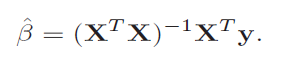

In [659]:
# # should produce an error 
# x_transpose = np.transpose(X_train.values)
# xT_x = np.matmul(x_transpose , X_train.values)
# inverse_xT_x = np.linalg.inv(xT_x)
# optimum_coefficients = np.matmul((np.matmul(inverse_xT_x, x_transpose)), y_train.values)

### Treating the previous error using the Singular Value Decomposition to calculate the pseudo-inverse of the data matrix
optimal coefficients = image.png

In [660]:
# # calculating the economy svd (where the u matrix has the same size as the data matrix X, nad the sigma matrix is square matrix)
# # AKA: no silent vectors in the u Matrix, so it is not square and not orthogonal (uTu = I, but uuT is != I)
# def linear_reg_SVD(X, Y, zero_threshold = 1e-13):
#   u, s, vT = np.linalg.svd(X, full_matrices= False)

#   # Now initialize the "pseudo-"inverse of Sigma, where "pseudo" means "don't divide by zero"
#   sigma_pseudo_inverse = np.zeros((vT.shape[0], vT.shape[0]))

#   ## getting the index of the first approximately zero singular value
#   idx_nearly_zero_sigma= np.where(s <= zero_threshold)[0][0]

#   # 1/non-zero diagonal elements calculation
#   sigma_pseudo_inverse[:idx_nearly_zero_sigma,:idx_nearly_zero_sigma] = np.diag(1/s[ :idx_nearly_zero_sigma])
#   #the above three lines could have been calculated via:
#   # sigma_pseudo_inverse = = np.linalg.pinv(np.diag(s), rcond=1e-13)

#   # calculating the optimal coefficients
#   optimal_coefficients = vT.T.dot(sigma_pseudo_inverse).dot(u.T).dot(Y)
#   return optimal_coefficients

In [661]:
# optimal_coefficients = linear_reg_SVD(X_train, y_train, zero_threshold = 1e-13)
# y_hat_from_scratch = X_train.values.dot(optimal_coefficients)

### Comparing our output to the implemented solution in sklearn (which is calculated using the pseudo inverse of train data as we did above)

In [662]:
## trying the linear regression of sklearn with closed form solution approximated with the SVD as well
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [663]:
y_hat_sklearn = regressor.predict(X_train)

In [664]:
regressor.score(X_train , y_train) 

0.868956730619726

In [665]:
regressor.score(X_val , y_val) 

0.8850819437189293

In [673]:
# min_max_scaler_y.inverse_transform(y_hat_sklearn)

In [667]:
scaled_y_hat_val = regressor.predict(X_val)

In [668]:
real_y_hat_val = min_max_scaler_y.inverse_transform(scaled_y_hat_val)
real_y_val = min_max_scaler_y.inverse_transform(y_val)

In [669]:
pd.DataFrame(real_y_hat_val).rename(columns={0:'predectid prices'})

,predectid prices
0,149814.558029
1,83873.271942
2,129127.187729
3,233870.196342
4,296338.758469
...,...
301,152005.758286
302,307453.703880
303,120837.459564
304,112437.467575


In [670]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(real_y_val , real_y_hat_val))

23585.126133422724

# Multicollinearity Handling 

In [674]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
feats_high_vif_to_be_dropped = []
cleaned_df_from_multi_coll = X_train
num_cols_removed = 0

for origin_df_feat_index in range(len(X_train.columns)):
  num_cols_removed = X_train.shape[1] - cleaned_df_from_multi_coll.shape[1]

  cleaned_df_feat_index = origin_df_feat_index - num_cols_removed
    
  VIF_FEAT = variance_inflation_factor(cleaned_df_from_multi_coll.values, cleaned_df_feat_index)
  if VIF_FEAT > 20:
        
    feats_high_vif_to_be_dropped.append(cleaned_df_from_multi_coll.columns[cleaned_df_feat_index])
    cleaned_df_from_multi_coll = cleaned_df_from_multi_coll.drop(columns = [cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]])

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarni

In [675]:
feats_high_vif_to_be_dropped

['Gable',
 'Stucco',
 '1Story',
 'MetalSd',
 'Blueste',
 'VinylSd',
 'Somerst',
 '2ndFlrSF',
 'Corner',
 'RH',
 '2Types',
 'BrkTil',
 'CBlock',
 'Detchd',
 'ExterQual',
 '1stFlrSF',
 'RL',
 'YearBuilt',
 'BedroomAbvGr',
 'GrLivArea',
 'FullBath']

In [676]:
cleaned_df_from_multi_coll.shape

(917, 95)

#### Having cleaned our training data from multi-collinearity, we can measure the significance level of each feature and perform subset selection using the backward-stepwise method

In [711]:
from statsmodels.api import OLS
LRresult = OLS(y_train.values,cleaned_df_from_multi_coll).fit().summary2().tables[1]
LRresult

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
HalfBath,0.052876,0.015147,3.490841,5.071535e-04,0.023145,0.082608
GarageCars,0.134768,0.018783,7.175158,1.613924e-12,0.097901,0.171636
BsmtExposure,-0.001941,0.003445,-0.563399,5.733166e-01,-0.008704,0.004822
2.5Unf,0.004097,0.039370,0.104071,9.171385e-01,-0.073181,0.081375
MoSold,-0.000736,0.013173,-0.055895,9.554392e-01,-0.026593,0.025120
...,...,...,...,...,...,...
FV,-0.060525,0.025913,-2.335736,1.974461e-02,-0.111388,-0.009662
CarPort,-0.011734,0.053929,-0.217581,8.278100e-01,-0.117589,0.094121
Wd Sdng,0.000326,0.032558,0.010020,9.920075e-01,-0.063581,0.064234
Wd Sdng,-0.021149,0.032959,-0.641671,5.212654e-01,-0.085842,0.043544


In [712]:
significant_feats_df = cleaned_df_from_multi_coll
LRresult = (OLS(y_train.values,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})
insignificant_feats_ls = []

while LRresult['P>|t|'].max() > 0.05:
  insignificant_feat = LRresult[LRresult['P>|t|'] == LRresult['P>|t|'].max()][['feature_name']].values[0, 0]
  insignificant_feats_ls.append(insignificant_feat)
  significant_feats_df = significant_feats_df.drop(columns = [insignificant_feat])
  LRresult = (OLS(y_train.values,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})

In [716]:
len(insignificant_feats_ls)

72

In [714]:
LRresult

,feature_name,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
0,HalfBath,0.044079,0.013940,3.162142,1.618468e-03,0.016721,0.071437
1,GarageCars,0.129060,0.017096,7.549183,1.071252e-13,0.095507,0.162612
2,KitchenQual,-0.014129,0.003241,-4.360105,1.449734e-05,-0.020489,-0.007769
3,OverallQual,0.563238,0.027550,20.443992,1.254923e-76,0.509168,0.617308
4,LotArea,0.038816,0.003505,11.075735,8.054919e-27,0.031938,0.045694
5,OpenPorchSF,0.033534,0.009017,3.719005,2.123599e-04,0.015837,0.051230
6,WoodDeckSF,0.025022,0.007961,3.142979,1.727018e-03,0.009397,0.040647
7,BsmtFinSF1,0.173859,0.020223,8.597259,3.569865e-17,0.134170,0.213548
8,NoRidge,-0.056163,0.017998,-3.120590,1.862310e-03,-0.091486,-0.020841
9,Crawfor,-0.043323,0.016893,-2.564580,1.049090e-02,-0.076477,-0.010169


## Using Shrinkage methods (Ridge, Lasso and Elastic Net) to decrease the variance of the model while sacrificing a little of bias

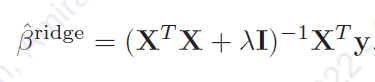
### The above formula can be used for determining the coefficients of ridge regression (but without bias)

In [718]:
lambda_ = 0.0001
ridge_coeffs = (np.linalg.inv(X_train.T.dot(X_train) +
               (lambda_ * np.identity(X_train.shape[1])))).dot((X_train.T).dot(y_train.values))

In [719]:
y_ridge_from_scratch = X_train.values.dot(ridge_coeffs)

In [720]:
y_ridge_from_scratch

array([[ 0.264551  ],
       [ 0.32112678],
       [ 0.56032328],
       [ 0.5182911 ],
       [ 0.30258702],
       [ 0.58735436],
       [ 0.42850254],
       [ 0.22718162],
       [ 0.38992974],
       [ 0.37255707],
       [ 0.32873414],
       [ 0.57365078],
       [ 0.28690586],
       [ 0.45085292],
       [ 0.6847037 ],
       [ 0.50593082],
       [ 0.59255963],
       [ 0.6898693 ],
       [ 0.56953866],
       [ 0.31254304],
       [ 0.512778  ],
       [ 0.46558824],
       [ 0.25753666],
       [ 0.31915158],
       [ 0.26268302],
       [ 0.3149019 ],
       [ 0.31535033],
       [ 0.4737432 ],
       [ 0.66615691],
       [ 0.6230051 ],
       [ 0.37380294],
       [ 0.56924637],
       [ 0.29395613],
       [ 0.37717491],
       [ 0.51869847],
       [ 0.21337025],
       [ 0.28554089],
       [ 0.7093424 ],
       [ 0.73792921],
       [ 0.37068078],
       [ 0.21880861],
       [ 0.25691022],
       [ 0.5449755 ],
       [ 0.37793925],
       [ 0.43621407],
       [ 0

In [723]:
from sklearn.linear_model import Ridge
sklearn_ridge = Ridge(alpha = 0.0001, fit_intercept=False)
sklearn_ridge.fit(X_train, y_train)
y_ridge_sklearn = sklearn_ridge.predict(X_train)
y_ridge_sklearn

array([[ 0.264551  ],
       [ 0.32112678],
       [ 0.56032328],
       [ 0.5182911 ],
       [ 0.30258702],
       [ 0.58735436],
       [ 0.42850254],
       [ 0.22718162],
       [ 0.38992974],
       [ 0.37255706],
       [ 0.32873414],
       [ 0.57365078],
       [ 0.28690586],
       [ 0.45085292],
       [ 0.6847037 ],
       [ 0.50593082],
       [ 0.59255963],
       [ 0.6898693 ],
       [ 0.56953866],
       [ 0.31254304],
       [ 0.512778  ],
       [ 0.46558824],
       [ 0.25753666],
       [ 0.31915158],
       [ 0.26268302],
       [ 0.3149019 ],
       [ 0.31535033],
       [ 0.4737432 ],
       [ 0.66615691],
       [ 0.6230051 ],
       [ 0.37380294],
       [ 0.56924637],
       [ 0.29395613],
       [ 0.37717491],
       [ 0.51869847],
       [ 0.21337025],
       [ 0.28554089],
       [ 0.7093424 ],
       [ 0.73792921],
       [ 0.37068078],
       [ 0.21880861],
       [ 0.25691022],
       [ 0.5449755 ],
       [ 0.37793925],
       [ 0.43621407],
       [ 0

In [724]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)

poly_feats_linear_reg = LinearRegression()
poly_feats_linear_reg.fit(X_poly, y_train)

LinearRegression()

In [725]:
poly_feats_linear_reg.score(X_poly, y_train)

1.0